**–õ–∞–±–æ–∞—Ç–æ—Ä–Ω–∞—è —Ä–∞–±–æ—Ç–∞ ‚Ññ 2**

–í—ã–ø–æ–ª–Ω–∏–ª —Å—Ç—É–¥–µ–Ω—Ç –≥—Ä—É–ø–ø—ã –ë–ë–ú–û-02-23

**–ö—É—Ä—á–µ–Ω–∫–æ –ò–≤–∞–Ω –î–º–∏—Ç—Ä–∏–µ–≤–∏—á**

1. ## –£—Å—Ç–∞–Ω–æ–≤–∫–∞ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ *adversarial-robustness-toolbox*
–ë–∏–±–ª–∏–æ—Ç–µ–∫–∞ Adversarial Robustness Toolbox (ART) –ø—Ä–µ–¥–Ω–∞–∑–Ω–∞—á–µ–Ω–∞ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞, —Ä–∞–∑—Ä–∞–±–æ—Ç–∫–∏ –∏ –∑–∞—â–∏—Ç—ã –º–æ–¥–µ–ª–µ–π –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è –æ—Ç –∞—Ç–∞–∫ –∑–ª–æ—É–º—ã—à–ª–µ–Ω–Ω–∏–∫–æ–≤.

In [1]:
!pip install adversarial-robustness-toolbox

2. ## –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫

In [2]:
import cv2
import os
import torch
import random
import pickle
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.applications import ResNet50
from keras.applications import VGG16
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.models import load_model, save_model
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.metrics import categorical_accuracy
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape, Lambda
from art.estimators.classification import KerasClassifier
from art.attacks.evasion import FastGradientMethod, ProjectedGradientDescent
%matplotlib inline

3. ## –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞ —Å Kaggle —Å –ø–æ–º–æ—â—å—é KaggleHub

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1


4. ## –ó–∞–¥–∞–Ω–∏–µ –ø—É—Ç–µ–π –∫ —Ä–∞–∑–∞—Ä—Ö–∏–≤–∏—Ä–æ–≤–∞–Ω–Ω—ã–º –¥–∞–Ω–Ω—ã–º

 **–ó–∞–¥–∞–Ω–∏–µ –ø—É—Ç–µ–π –∫ —Ä–∞–∑–∞—Ä—Ö–∏–≤–∏—Ä–æ–≤–∞–Ω–Ω—ã–º –¥–∞–Ω–Ω—ã–º**  
   –í —ç—Ç–æ–º —Ä–∞–∑–¥–µ–ª–µ –∑–∞–¥–∞—é—Ç—Å—è –ø—É—Ç–∏ –∫ —Ä–∞–∑–∞—Ä—Ö–∏–≤–∏—Ä–æ–≤–∞–Ω–Ω—ã–º –¥–∞–Ω–Ω—ã–º –¥–∞—Ç–∞—Å–µ—Ç–∞ **GTSRB** (German Traffic Sign Recognition Benchmark).  
   - **`data_path`**: –æ—Å–Ω–æ–≤–Ω–æ–π –ø—É—Ç—å –∫ —Ä–∞–∑–∞—Ä—Ö–∏–≤–∏—Ä–æ–≤–∞–Ω–Ω—ã–º –¥–∞–Ω–Ω—ã–º.  
   - **`train_dir`**: –ø—É—Ç—å –∫ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ, –∫–æ—Ç–æ—Ä–∞—è —Ö—Ä–∞–Ω–∏—Ç—Å—è –≤ –ø–∞–ø–∫–µ `Train`.  
   - **`val_dir`**: –ø—É—Ç—å –∫ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ, –∫–æ—Ç–æ—Ä–∞—è —Ö—Ä–∞–Ω–∏—Ç—Å—è –≤ –ø–∞–ø–∫–µ `Test`.  
   - **`meta_dir`**: –ø—É—Ç—å –∫ –º–µ—Ç–∞–¥–∞–Ω–Ω—ã–º –¥–∞—Ç–∞—Å–µ—Ç–∞, —Ö—Ä–∞–Ω—è—â–∏–º—Å—è –≤ –ø–∞–ø–∫–µ `Meta`.

 **–ü—Ä–æ—Å–º–æ—Ç—Ä —Å–æ–¥–µ—Ä–∂–∏–º–æ–≥–æ –ø–∞–ø–∫–∏ —Å —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏**  
   –í —ç—Ç–æ–º —à–∞–≥–µ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –∫–æ–º–∞–Ω–¥–∞ **`%ls`** –¥–ª—è –≤—ã–≤–æ–¥–∞ —Å–ø–∏—Å–∫–∞ —Ñ–∞–π–ª–æ–≤ –≤ –ø–∞–ø–∫–µ `Train`, —Å–æ–¥–µ—Ä–∂–∞—â–µ–π –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã–µ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏. –≠—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç —É–±–µ–¥–∏—Ç—å—Å—è –≤ –Ω–∞–ª–∏—á–∏–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö —Ñ–∞–π–ª–æ–≤ –∏ –∏—Ö —Å—Ç—Ä—É–∫—Ç—É—Ä–µ.

In [4]:
# –∑–∞–¥–∞–µ–º –ø—É—Ç–∏ –∫ —Ä–∞–∑–∞—Ä—Ö–∏–≤–∏—Ä–æ–≤–∞–Ω–Ω—ã–º –¥–∞–Ω–Ω—ã–º
data_path = '/root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1'
train_dir = os.path.join(data_path, 'Train')
val_dir = os.path.join(data_path, 'Test')
meta_dir = os.path.join(data_path, 'Meta')
%ls /root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1/Train

0/   11/  14/  17/  2/   22/  25/  28/  30/  33/  36/  39/  41/  6/  9/
1/   12/  15/  18/  20/  23/  26/  29/  31/  34/  37/  4/   42/  7/
10/  13/  16/  19/  21/  24/  27/  3/   32/  35/  38/  40/  5/   8/


5. ## –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–π –∏ —Ç–µ—Å—Ç–æ–≤—ã–π –Ω–∞–±–æ—Ä—ã


1. **–ó–∞–¥–∞–Ω–∏–µ –ø—É—Ç–µ–π –∫ –∏—Å—Ö–æ–¥–Ω—ã–º –∏ —Ü–µ–ª–µ–≤—ã–º –ø–∞–ø–∫–∞–º**  
   –í —ç—Ç–æ–º —à–∞–≥–µ –∑–∞–¥–∞—é—Ç—Å—è –ø—É—Ç–∏ –∫ –∏—Å—Ö–æ–¥–Ω–æ–π –ø–∞–ø–∫–µ —Å –¥–∞–Ω–Ω—ã–º–∏ –∏ –ø–∞–ø–∫–µ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è —Ä–∞–∑–¥–µ–ª—ë–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö:
   - **`source_dir`**: –ø—É—Ç—å –∫ –∏—Å—Ö–æ–¥–Ω—ã–º –¥–∞–Ω–Ω—ã–º, —Ö—Ä–∞–Ω—è—â–∏–º—Å—è –≤ –ø–∞–ø–∫–µ —Å —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º–∏.
   - **`output_dir`**: –ø—É—Ç—å, –≥–¥–µ –±—É–¥—É—Ç —Å–æ—Ö—Ä–∞–Ω—è—Ç—å—Å—è –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–µ –∏ —Ç–µ—Å—Ç–æ–≤—ã–µ).

2. **–°–æ–∑–¥–∞–Ω–∏–µ –ø–∞–ø–æ–∫ –¥–ª—è —Ä–∞–∑–¥–µ–ª—ë–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö**  
   –°–æ–∑–¥–∞—é—Ç—Å—è –¥–≤–µ –æ—Å–Ω–æ–≤–Ω—ã–µ –ø–∞–ø–∫–∏ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è:
   - **`train_dir`**: –ø–∞–ø–∫–∞ –¥–ª—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.
   - **`test_dir`**: –ø–∞–ø–∫–∞ –¥–ª—è —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö.

3. **–†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–µ –∏ —Ç–µ—Å—Ç–æ–≤—ã–µ –Ω–∞–±–æ—Ä—ã**  
   –í —ç—Ç–æ–º —à–∞–≥–µ –¥–∞–Ω–Ω—ã–µ –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞ —Ä–∞–∑–±–∏–≤–∞—é—Ç—Å—è –Ω–∞ –¥–≤–µ –≥—Ä—É–ø–ø—ã (—Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é) —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Ñ—É–Ω–∫—Ü–∏–∏ **`train_test_split`**:
   - **`test_size`**: –¥–æ–ª—è –¥–∞–Ω–Ω—ã—Ö, –∫–æ—Ç–æ—Ä–∞—è –±—É–¥–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ (20% –≤ –¥–∞–Ω–Ω–æ–º –ø—Ä–∏–º–µ—Ä–µ).
   - –î–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞ —Å–æ–∑–¥–∞—é—Ç—Å—è –æ—Ç–¥–µ–ª—å–Ω—ã–µ –ø–∞–ø–∫–∏ –∏ —Ñ–∞–π–ª—ã –∫–æ–ø–∏—Ä—É—é—Ç—Å—è –≤ –Ω–∏—Ö.

4. **–ö–æ–ø–∏—Ä–æ–≤–∞–Ω–∏–µ —Ñ–∞–π–ª–æ–≤ –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –ø–∞–ø–∫–∏**  
   –ü–æ—Å–ª–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –¥–∞–Ω–Ω—ã–µ –∫–æ–ø–∏—Ä—É—é—Ç—Å—è –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –ø–∞–ø–∫–∏ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–≥–æ –∏ —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –Ω–∞–±–æ—Ä–æ–≤.

5. **–í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞**  
   –í—ã–≤–æ–¥–∏—Ç—Å—è —Å–æ–æ–±—â–µ–Ω–∏–µ –æ–± —É—Å–ø–µ—à–Ω–æ–º —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–∏ –¥–∞–Ω–Ω—ã—Ö, —É–∫–∞–∑—ã–≤–∞—è –ø—É—Ç—å –∫ —Å–æ—Ö—Ä–∞–Ω—ë–Ω–Ω—ã–º —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º –∏ —Ç–µ—Å—Ç–æ–≤—ã–º –¥–∞–Ω–Ω—ã–º.

In [5]:
import os
import shutil
from sklearn.model_selection import train_test_split

# –ü—É—Ç—å –∫ –∏—Å—Ö–æ–¥–Ω–æ–π –ø–∞–ø–∫–µ —Å –¥–∞–Ω–Ω—ã–º–∏
source_dir = train_dir  # –ü–∞–ø–∫–∞ —Å –∏—Å—Ö–æ–¥–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏, —Ä–∞–∑–±–∏—Ç—ã–º–∏ –ø–æ –∫–ª–∞—Å—Å–∞–º
output_dir = os.path.join(data_path, 'ProcessedData')  # –ü–∞–ø–∫–∞ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è —Ä–∞–∑–¥–µ–ª–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö

# –°–æ–∑–¥–∞–µ–º –ø–∞–ø–∫–∏ –¥–ª—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –∏ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
test_size = 0.2  # –î–æ–ª—è –¥–∞–Ω–Ω—ã—Ö –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –Ω–∞–±–æ—Ä–∞

# –ü—Ä–æ—Ö–æ–¥–∏–º –ø–æ –∫–∞–∂–¥–æ–º—É –∫–ª–∞—Å—Å—É
for class_name in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_name)

    # –ü—Ä–æ–≤–µ—Ä—è–µ–º, —á—Ç–æ —ç—Ç–æ –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏—è
    if os.path.isdir(class_path):
        # –°–æ–∑–¥–∞–µ–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –ø–∞–ø–∫–∏ –¥–ª—è –∫–ª–∞—Å—Å–∞ –≤ train –∏ test
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

        # –ü–æ–ª—É—á–∞–µ–º —Å–ø–∏—Å–æ–∫ –≤—Å–µ—Ö —Ñ–∞–π–ª–æ–≤ –≤ –∫–ª–∞—Å—Å–µ
        files = os.listdir(class_path)
        files = [f for f in files if os.path.isfile(os.path.join(class_path, f))]

        # –†–∞–∑–¥–µ–ª—è–µ–º —Ñ–∞–π–ª—ã –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–µ –∏ —Ç–µ—Å—Ç–æ–≤—ã–µ
        train_files, test_files = train_test_split(files, test_size=test_size, random_state=42)

        # –ö–æ–ø–∏—Ä—É–µ–º —Ñ–∞–π–ª—ã –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –ø–∞–ø–∫–∏
        for file in train_files:
            shutil.copy(os.path.join(class_path, file), os.path.join(train_dir, class_name, file))
        for file in test_files:
            shutil.copy(os.path.join(class_path, file), os.path.join(test_dir, class_name, file))

print(f"–î–∞–Ω–Ω—ã–µ —É—Å–ø–µ—à–Ω–æ —Ä–∞–∑–¥–µ–ª–µ–Ω—ã. –¢—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ: {train_dir}, –¢–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ: {test_dir}")


–î–∞–Ω–Ω—ã–µ —É—Å–ø–µ—à–Ω–æ —Ä–∞–∑–¥–µ–ª–µ–Ω—ã. –¢—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ: /root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1/ProcessedData/train, –¢–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ: /root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1/ProcessedData/test


6. ## –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ ResNet50 —Å –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ–º –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö


1. **–ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –∏ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö**  
   –í –¥–∞–Ω–Ω–æ–º —à–∞–≥–µ —Å–æ–∑–¥–∞–µ—Ç—Å—è –æ–±—ä–µ–∫—Ç `ImageDataGenerator` –¥–ª—è –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö. –ê—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è –≤–∫–ª—é—á–∞–µ—Ç –≤ —Å–µ–±—è:
   - –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—é –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π (–º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π –ø–∏–∫—Å–µ–ª–µ–π –æ—Ç 0 –¥–æ 1).
   - –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π (–ø–æ–≤–æ—Ä–æ—Ç—ã, —Å–¥–≤–∏–≥–∏, –∏–∑–º–µ–Ω–µ–Ω–∏–µ –º–∞—Å—à—Ç–∞–±–∞ –∏ –ø—Ä.), —á—Ç–æ–±—ã —É–≤–µ–ª–∏—á–∏—Ç—å —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏–µ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –∏ –ø–æ–≤—ã—Å–∏—Ç—å –æ–±—â—É—é —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å –º–æ–¥–µ–ª–∏.
   - –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é –≤—ã–±–æ—Ä–∫–∏ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º `validation_split=0.2`.

2. **–ó–∞–≥—Ä—É–∑–∫–∞ –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ ResNet50**  
   –ò—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å **ResNet50** —Å –≤–µ—Å–∞–º–∏, –ø–æ–ª—É—á–µ–Ω–Ω—ã–º–∏ –Ω–∞ –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö **ImageNet**. –í –º–æ–¥–µ–ª–∏ –æ—Ç–∫–ª—é—á–µ–Ω –≤–µ—Ä—Ö–Ω–∏–π —Å–ª–æ–π, —Ç–∞–∫ –∫–∞–∫ –º—ã –±—É–¥–µ–º –¥–æ–±–∞–≤–ª—è—Ç—å —Å–≤–æ–∏ —Å–ª–æ–∏ –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ 43 –∫–ª–∞—Å—Å–æ–≤ –¥–æ—Ä–æ–∂–Ω—ã—Ö –∑–Ω–∞–∫–æ–≤.

3. **–î–æ–±–∞–≤–ª–µ–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏—Ö —Å–ª–æ–µ–≤**  
   –ö –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ –¥–æ–±–∞–≤–ª—è—é—Ç—Å—è –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏—Ö —Å–ª–æ–µ–≤:
   - **GlobalAveragePooling2D** –¥–ª—è —É–º–µ–Ω—å—à–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏.
   - –ü–ª–æ—Ç–Ω—ã–π —Å–ª–æ–π —Å 256 –Ω–µ–π—Ä–æ–Ω–∞–º–∏ –∏ —Ñ—É–Ω–∫—Ü–∏–µ–π –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ **ReLU**.
   - –í—ã—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –Ω–µ–π—Ä–æ–Ω–æ–≤, —Ä–∞–≤–Ω—ã–º –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –∫–ª–∞—Å—Å–æ–≤ (43), —Å —Ñ—É–Ω–∫—Ü–∏–µ–π –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ **softmax** –¥–ª—è –º–Ω–æ–≥–æ–∫–ª–∞—Å—Å–æ–≤–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.

4. **"–ó–∞–º–æ—Ä–æ–∑–∫–∞" –±–∞–∑–æ–≤–æ–π –º–æ–¥–µ–ª–∏**  
   –ù–∞ –Ω–∞—á–∞–ª—å–Ω–æ–º —ç—Ç–∞–ø–µ –æ–±—É—á–µ–Ω–∏—è –≤–µ—Å–∞ –±–∞–∑–æ–≤–æ–π –º–æ–¥–µ–ª–∏ **ResNet50** —Ñ–∏–∫—Å–∏—Ä—É—é—Ç—Å—è, —á—Ç–æ–±—ã –æ–Ω–∏ –Ω–µ –∏–∑–º–µ–Ω—è–ª–∏—Å—å –≤ —Ö–æ–¥–µ –æ–±—É—á–µ–Ω–∏—è. –≠—Ç–æ –ø–æ–º–æ–≥–∞–µ—Ç –∏–∑–±–µ–∂–∞—Ç—å –∏–∑–º–µ–Ω–µ–Ω–∏—è –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –≤–æ –≤—Ä–µ–º—è –ø–µ—Ä–≤–æ–π —Ñ–∞–∑—ã —Ç—Ä–µ–Ω–∏—Ä–æ–≤–∫–∏.

5. **–ö–æ–º–ø–∏–ª—è—Ü–∏—è –º–æ–¥–µ–ª–∏**  
   –ú–æ–¥–µ–ª—å –∫–æ–º–ø–∏–ª–∏—Ä—É–µ—Ç—Å—è —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞ **Adam** –∏ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å **categorical_crossentropy** –¥–ª—è –º–Ω–æ–≥–æ–∫–ª–∞—Å—Å–æ–≤–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏. –ò—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –º–µ—Ç—Ä–∏–∫–∞ **accuracy** –¥–ª—è –æ—Ç—Å–ª–µ–∂–∏–≤–∞–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏.

6. **–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏**  
   –ú–æ–¥–µ–ª—å –æ–±—É—á–∞–µ—Ç—Å—è –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –≤ —Ç–µ—á–µ–Ω–∏–µ 10 —ç–ø–æ—Ö. –í –∫–∞—á–µ—Å—Ç–≤–µ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –¥–∞–Ω–Ω—ã–µ –∏–∑ `val_generator`, —Å–æ–∑–¥–∞–Ω–Ω–æ–≥–æ –Ω–∞ –æ—Å–Ω–æ–≤–µ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏.

7. **–†–∞–∑–º–æ—Ä–æ–∑–∫–∞ –∏ –¥–æ–æ–±—É—á–µ–Ω–∏–µ**  
   –ü–æ—Å–ª–µ –Ω–∞—á–∞–ª—å–Ω–æ–π —Ñ–∞–∑—ã –æ–±—É—á–µ–Ω–∏—è –≤—Å–µ —Å–ª–æ–∏ –º–æ–¥–µ–ª–∏ —Ä–∞–∑–º–æ—Ä–∞–∂–∏–≤–∞—é—Ç—Å—è, —á—Ç–æ–±—ã –¥–æ–æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å –∏ –ø–æ–∑–≤–æ–ª–∏—Ç—å –∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∞—Ç—å –≤–µ—Å–∞ –±–∞–∑–æ–≤–æ–π –º–æ–¥–µ–ª–∏. –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏ —Å–Ω–æ–≤–∞ –∫–æ–º–ø–∏–ª–∏—Ä—É—é—Ç—Å—è —Å –º–∞–ª—ã–º –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–º –æ–±—É—á–µ–Ω–∏—è (**learning rate = 1e-5**) –¥–ª—è –ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—â–µ–Ω–∏—è –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã—Ö –∏–∑–º–µ–Ω–µ–Ω–∏–π –≤ –≤–µ—Å–∞—Ö. –ú–æ–¥–µ–ª—å –æ–±—É—á–∞–µ—Ç—Å—è –µ—â—ë 10 —ç–ø–æ—Ö –¥–ª—è —Ñ–∏–Ω–∞–ª—å–Ω–æ–π –¥–æ–Ω–∞—Å—Ç—Ä–æ–π–∫–∏.

8. **–°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏**  
   –ü–æ—Å–ª–µ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç—Å—è –≤ —Ñ–∞–π–ª **'ResNet50.h5'**, —á—Ç–æ–±—ã –º–æ–∂–Ω–æ –±—ã–ª–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –µ–µ –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –Ω–∞ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö.

In [6]:
IMG_SIZE = (224, 224)  # ResNet50 –æ–∂–∏–¥–∞–µ—Ç 224x224 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
BATCH_SIZE = 32
NUM_CLASSES = 43  # GTSRB —Å–æ–¥–µ—Ä–∂–∏—Ç 43 –∫–ª–∞—Å—Å–∞
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# 2. –ó–∞–≥—Ä—É–∑–∫–∞ –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 3. –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏—Ö —Å–ª–æ–µ–≤
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–π –ø–ª–æ—Ç–Ω—ã–π —Å–ª–æ–π
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# 4. "–ó–∞–º–æ—Ä–æ–∑–∫–∞" –±–∞–∑–æ–≤–æ–π –º–æ–¥–µ–ª–∏ –¥–ª—è –ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—â–µ–Ω–∏—è –∏–∑–º–µ–Ω–µ–Ω–∏—è –≤–µ—Å–æ–≤ –≤–æ –≤—Ä–µ–º—è –Ω–∞—á–∞–ª—å–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è
for layer in base_model.layers:
    layer.trainable = False

# 5. –ö–æ–º–ø–∏–ª—è—Ü–∏—è –º–æ–¥–µ–ª–∏
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 6. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# 7. –†–∞–∑–º–æ—Ä–æ–∑–∫–∞ –∏ –¥–æ–æ–±—É—á–µ–Ω–∏–µ
for layer in base_model.layers:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

history_fine_tune = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)
save_model(model, 'ResNet50.h5')

Found 25110 images belonging to 43 classes.
Found 1550 images belonging to 43 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


785/785 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 347s 424ms/step - accuracy: 0.0735 - loss: 3.4637 - val_accuracy: 0.1226 - val_loss: 3.2337
Epoch 2/10
785/785 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 360s 402ms/step - accuracy: 0.1345 - loss: 3.2221 - val_accuracy: 0.1652 - val_loss: 3.0790
Epoch 3/10
785/785 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 321s 401ms/step - accuracy: 0.1755 - loss: 3.0405 - val_accuracy: 0.1574 - val_loss: 3.0045
Epoch 4/10
785/785 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 314s 397ms/step - accuracy: 0.1948 - loss: 2.9227 - val_accuracy: 0.1787 - val_loss: 2.9437
Epoch 5/10
785/785 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 322s 398ms/step - accuracy: 0.2170 - loss: 2.8378 - val_accuracy: 0.2006 - val_loss: 2.8565
Epoch 6/10
785/785 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 310s 392ms/step - accuracy: 0.2292 - loss: 2.7606 - val_accuracy: 0.236

7. ## –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ VGG16 —Å –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–µ–π –¥–∞–Ω–Ω—ã—Ö


1. **–ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –∏ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö**  
   –í —ç—Ç–æ–º —à–∞–≥–µ —Å–æ–∑–¥–∞–µ—Ç—Å—è –æ–±—ä–µ–∫—Ç `ImageDataGenerator` –¥–ª—è –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö —Å —Ä–∞–∑–ª–∏—á–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏:
   - –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π.
   - –ü–æ–≤–æ—Ä–æ—Ç—ã, —Å–¥–≤–∏–≥–∏ –ø–æ –æ—Å—è–º, —Å–¥–≤–∏–≥ –º–∞—Å—à—Ç–∞–±–∞, –∏—Å–∫–∞–∂–µ–Ω–∏—è, –∑—É–º –∏ –¥—Ä—É–≥–∏–µ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è –æ–±–æ–±—â–∞—é—â–µ–π —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏.
   - –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é –≤—ã–±–æ—Ä–∫–∏ —Å –ø–æ–º–æ—â—å—é –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ `validation_split=0.2`.

2. **–ó–∞–≥—Ä—É–∑–∫–∞ –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ VGG16**  
   –ò—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å **VGG16**, –∫–æ—Ç–æ—Ä–∞—è —É–∂–µ –æ–±—É—á–µ–Ω–∞ –Ω–∞ –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö **ImageNet**, —Å –æ—Ç–∫–ª—é—á–µ–Ω–Ω—ã–º –≤–µ—Ä—Ö–Ω–∏–º —Å–ª–æ–µ–º –¥–ª—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –≤ –∫–∞—á–µ—Å—Ç–≤–µ –±–∞–∑–æ–≤–æ–π –º–æ–¥–µ–ª–∏.

3. **–î–æ–±–∞–≤–ª–µ–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏—Ö —Å–ª–æ–µ–≤**  
   –í –∫–∞—á–µ—Å—Ç–≤–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞ –¥–æ–±–∞–≤–ª—è—é—Ç—Å—è –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ —Å–ª–æ–∏:
   - **Flatten** –¥–ª—è –≤—ã—Ä–∞–≤–Ω–∏–≤–∞–Ω–∏—è –≤—ã—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.
   - –î–≤–∞ –ø–ª–æ—Ç–Ω—ã—Ö —Å–ª–æ—è —Å 256 –Ω–µ–π—Ä–æ–Ω–∞–º–∏ –∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–µ–π **ReLU**.
   - –°–ª–æ–∏ **Dropout** –¥–ª—è —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏.
   - –í—ã—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π —Å —Ñ—É–Ω–∫—Ü–∏–µ–π –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ **softmax**, —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –∫–æ—Ç–æ—Ä–æ–≥–æ —Ä–∞–≤–Ω–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –∫–ª–∞—Å—Å–æ–≤ (43) –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –¥–æ—Ä–æ–∂–Ω—ã—Ö –∑–Ω–∞–∫–æ–≤ GTSRB.

4. **"–ó–∞–º–æ—Ä–æ–∑–∫–∞" –±–∞–∑–æ–≤—ã—Ö —Å–ª–æ–µ–≤**  
   –ù–∞ –Ω–∞—á–∞–ª—å–Ω–æ–º —ç—Ç–∞–ø–µ –≤—Å–µ —Å–ª–æ–∏ –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ –∑–∞–º–æ—Ä–∞–∂–∏–≤–∞—é—Ç—Å—è, —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –∏–∑–º–µ–Ω–µ–Ω–∏—è –≤–µ—Å–æ–≤ –≤–æ –≤—Ä–µ–º—è –ø–µ—Ä–≤–æ–π —Ñ–∞–∑—ã –æ–±—É—á–µ–Ω–∏—è.

5. **–ö–æ–º–ø–∏–ª—è—Ü–∏—è –º–æ–¥–µ–ª–∏**  
   –ú–æ–¥–µ–ª—å –∫–æ–º–ø–∏–ª–∏—Ä—É–µ—Ç—Å—è —Å –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–æ–º **Adam** –∏ —Ñ—É–Ω–∫—Ü–∏–µ–π –ø–æ—Ç–µ—Ä—å **categorical_crossentropy** –¥–ª—è –º–Ω–æ–≥–æ–∫–ª–∞—Å—Å–æ–≤–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏, –∞ —Ç–∞–∫–∂–µ –º–µ—Ç—Ä–∏–∫–æ–π **accuracy**.

6. **–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏**  
   –ú–æ–¥–µ–ª—å –æ–±—É—á–∞–µ—Ç—Å—è —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º `train2_generator` –¥–ª—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–∫–∏ –∏ `val2_generator` –¥–ª—è –≤–∞–ª–∏–¥–∞—Ü–∏–∏. –û–±—É—á–µ–Ω–∏–µ –ø—Ä–æ–≤–æ–¥–∏—Ç—Å—è –≤ —Ç–µ—á–µ–Ω–∏–µ 5 —ç–ø–æ—Ö.

7. **–†–∞–∑–º–æ—Ä–æ–∑–∫–∞ –∏ –¥–æ–æ–±—É—á–µ–Ω–∏–µ**  
   –ü–æ—Å–ª–µ –Ω–∞—á–∞–ª—å–Ω–æ–π —Ñ–∞–∑—ã –æ–±—É—á–µ–Ω–∏—è –∑–∞–º–æ—Ä–æ–∂–µ–Ω–Ω—ã–µ —Å–ª–æ–∏ —Ä–∞–∑–º–æ—Ä–∞–∂–∏–≤–∞—é—Ç—Å—è, —á—Ç–æ–±—ã –ø—Ä–æ–≤–µ—Å—Ç–∏ –¥–æ–æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å –æ—á–µ–Ω—å –º–∞–ª–µ–Ω—å–∫–∏–º —à–∞–≥–æ–º (learning rate = 1e-5). –ú–æ–¥–µ–ª—å –¥–æ–æ–±—É—á–∞–µ—Ç—Å—è –µ—â—ë 5 —ç–ø–æ—Ö.

8. **–°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏**  
   –ú–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç—Å—è –≤ —Ñ–∞–π–ª **'vgg16.h5'**, —á—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –µ—ë –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–∏—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –∏–ª–∏ –∞–Ω–∞–ª–∏–∑–∞.

In [7]:
# –°–æ–∑–¥–∞–Ω–∏–µ –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–æ–≤ –¥–∞–Ω–Ω—ã—Ö —Å –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–µ–π
train2_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    validation_split=0.2
)

train2_generator = train2_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val2_generator = train2_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# 2. –ó–∞–≥—Ä—É–∑–∫–∞ –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ VGG16
base_model2 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 3. –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏—Ö —Å–ª–æ–µ–≤
x = base_model2.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)  # –ü–µ—Ä–≤—ã–π –ø–ª–æ—Ç–Ω—ã–π —Å–ª–æ–π
x = Dropout(0.5)(x)  # Dropout –¥–ª—è —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏
x = Dense(256, activation='relu')(x)  # –í—Ç–æ—Ä–æ–π –ø–ª–æ—Ç–Ω—ã–π —Å–ª–æ–π
x = Dropout(0.5)(x)  # Dropout –¥–ª—è —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏
predictions = Dense(NUM_CLASSES, activation='softmax')(x)  # –í—ã—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –∫–ª–∞—Å—Å–æ–≤ GTSRB

model2 = Model(inputs=base_model2.input, outputs=predictions)

# 4. –ó–∞–º–æ—Ä–æ–∑–∫–∞ –±–∞–∑–æ–≤—ã—Ö —Å–ª–æ–µ–≤
for layer in base_model.layers:
    layer.trainable = False

# 5. –ö–æ–º–ø–∏–ª—è—Ü–∏—è –º–æ–¥–µ–ª–∏
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 6. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
history = model2.fit(
    train2_generator,
    epochs=5,
    validation_data=val2_generator
)

# 7. –†–∞–∑–º–æ—Ä–æ–∑–∫–∞ –∏ –¥–æ–æ–±—É—á–µ–Ω–∏–µ
for layer in base_model.layers:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

history_fine_tune = model.fit(
    train2_generator,
    epochs=5,
    validation_data=val2_generator
)

# 8. –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
model.save('vgg16.h5')

Found 25110 images belonging to 43 classes.
Found 1550 images belonging to 43 classes.
58889256/58889256 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step
Epoch 1/5
785/785 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 539s 631ms/step - accuracy: 0.0487 - loss: 3.6454 - val_accuracy: 0.0581 - val_loss: 3.4836
Epoch 2/5
785/785 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 458s 547ms/step - accuracy: 0.0533 - loss: 3.4960 - val_accuracy: 0.0542 - val_loss: 3.4811
Epoch 3/5
785/785 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 426s 540ms/step - accuracy: 0.0563 - loss: 3.4944 - val_accuracy: 0.0568 - val_loss: 3.4803
Epoch 4/5
785/785 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 428s 543ms/step - accuracy: 0.0579 - loss: 3.4972 - val_accuracy: 0.0529 - val_loss: 3.4790
Epoch 5/5
785/785 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 427s 540ms/step - accuracy: 0.0539 - loss: 3.4922 - val_acc

8. ## –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ VGG16: —Ç–æ—á–Ω–æ—Å—Ç—å –∏ –ø–æ—Ç–µ—Ä–∏

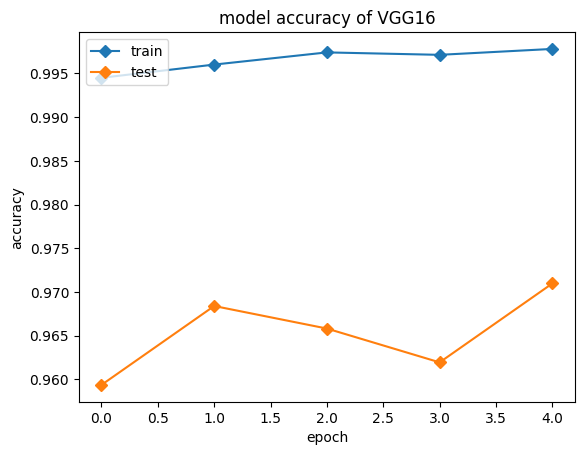

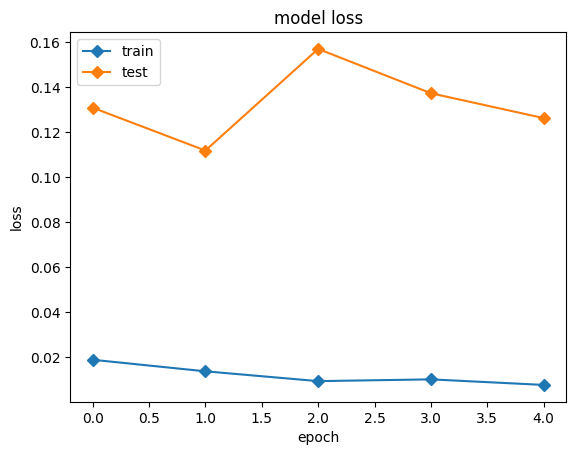

In [8]:
plt.plot(history_fine_tune.history['accuracy'], marker='D')
plt.plot(history_fine_tune.history['val_accuracy'], marker='D')
plt.title('model accuracy of VGG16')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# –≥—Ä–∞—Ñ–∏–∫ –ø–æ—Ç–µ—Ä—å
plt.plot(history_fine_tune.history['loss'], marker='D')
plt.plot(history_fine_tune.history['val_loss'], marker='D')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

9. ## –ü–æ–¥–∫–ª—é—á–µ–Ω–∏–µ Google Drive –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å —Ñ–∞–π–ª–∞–º–∏

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


10. ## –†–µ–∞–ª–∏–∑–∞—Ü–∏—è –∞—Ç–∞–∫–∏ FGSM –¥–ª—è –æ—Ü–µ–Ω–∫–∏ —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏ ResNet50


1. **–ó–∞–≥—Ä—É–∑–∫–∞ –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏**  
   –ó–∞–≥—Ä—É–∂–∞–µ—Ç—Å—è –º–æ–¥–µ–ª—å `ResNet50` –∏–∑ —Ñ–∞–π–ª–∞ `ResNet50.h5`, –∫–æ—Ç–æ—Ä—ã–π –±—ã–ª —Ä–∞–Ω–µ–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω. –≠—Ç–∞ –º–æ–¥–µ–ª—å –±—É–¥–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–π –æ—Ü–µ–Ω–∫–∏ —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç–∏ –∫ –∞—Ç–∞–∫–∞–º. –í–∫–ª—é—á–∞–µ—Ç—Å—è **eager execution** –≤ TensorFlow –¥–ª—è –¥–∏–Ω–∞–º–∏—á–µ—Å–∫–æ–≥–æ –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π.

2. **–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö**  
   - –°–æ–∑–¥–∞–µ—Ç—Å—è –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä `test_generator` –¥–ª—è –∑–∞–≥—Ä—É–∑–∫–∏ –∏ –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–∏ —Ç–µ—Å—Ç–æ–≤—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π —Å –ø–æ–º–æ—â—å—é `ImageDataGenerator`. –≠—Ç–∏ –¥–∞–Ω–Ω—ã–µ –±—É–¥—É—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –∫–∞–∫ –±–∞–∑–∞ –¥–ª—è –∞—Ç–∞–∫.
   - –ò—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π –ø–∏–∫—Å–µ–ª–µ–π (rescale) –¥–ª—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –≤ –¥–∏–∞–ø–∞–∑–æ–Ω –æ—Ç 0 –¥–æ 1.

3. **–ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –º–æ–¥–µ–ª–∏ –¥–ª—è –∞—Ç–∞–∫–∏**  
   –î–ª—è –∞—Ç–∞–∫–∏ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –±–∏–±–ª–∏–æ—Ç–µ–∫–∞ `art` (Adversarial Robustness Toolbox) –∏ –∫–ª–∞—Å—Å `TensorFlowV2Classifier`, –∫–æ—Ç–æ—Ä—ã–π –∏–Ω—Ç–µ–≥—Ä–∏—Ä—É–µ—Ç –º–æ–¥–µ–ª—å `ResNet50` –∏ –æ–±–µ—Å–ø–µ—á–∏–≤–∞–µ—Ç —Ä–∞—Å—á–µ—Ç –∞—Ç–∞–∫. –û–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è —Ñ—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å –¥–ª—è –º–Ω–æ–≥–æ–∫–ª–∞—Å—Å–æ–≤–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏ –ø–µ—Ä–µ–¥–∞–µ—Ç—Å—è –º–æ–¥–µ–ª—å –≤ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä.

4. **–ù–∞—Å—Ç—Ä–æ–π–∫–∞ –∞—Ç–∞–∫–∏ FGSM (Fast Gradient Sign Method)**  
   –ê—Ç–∞–∫–∞ FGSM –ø—Ä–∏–º–µ–Ω—è–µ—Ç—Å—è —Å —Ä–∞–∑–ª–∏—á–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ `eps` (–ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è, –æ–ø—Ä–µ–¥–µ–ª—è—é—â–∞—è —Å—Ç–µ–ø–µ–Ω—å –∏—Å–∫–∞–∂–µ–Ω–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π). –ê—Ç–∞–∫–∞ —Å–æ–∑–¥–∞–µ—Ç –∏—Å–∫–∞–∂–µ–Ω–Ω—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, –∏—Å–ø–æ–ª—å–∑—É—è –º–∞–ª–µ–Ω—å–∫–∏–µ –∏–∑–º–µ–Ω–µ–Ω–∏—è –≤ –ø–∏–∫—Å–µ–ª—è—Ö, —á—Ç–æ–±—ã —Å–±–∏—Ç—å —Å —Ç–æ–ª–∫—É –º–æ–¥–µ–ª—å.

5. **–û—Ü–µ–Ω–∫–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏ –Ω–∞ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö**  
   –î–ª—è –∫–∞–∂–¥–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è `eps` –≥–µ–Ω–µ—Ä–∏—Ä—É—é—Ç—Å—è –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, –∏ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç—Å—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ –Ω–∞ —ç—Ç–∏—Ö –∏—Å–∫–∞–∂–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö. –ó–∞—Ç–µ–º –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç—Å—è —Ç–æ—á–Ω–æ—Å—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –Ω–∞ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å–æ—Ö—Ä–∞–Ω—è—é—Ç—Å—è.

6. **–í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤**  
   –ü–æ—Å–ª–µ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∞—Ç–∞–∫ –Ω–∞ –∫–∞–∂–¥–æ–º –∑–Ω–∞—á–µ–Ω–∏–∏ `eps`, —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–æ—á–Ω–æ—Å—Ç–∏ –Ω–∞ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –≤—ã–≤–æ–¥—è—Ç—Å—è, —á—Ç–æ–±—ã –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å, –∫–∞–∫ —Ä–∞–∑–ª–∏—á–Ω—ã–µ —É—Ä–æ–≤–Ω–∏ –∏—Å–∫–∞–∂–µ–Ω–∏–π –≤–ª–∏—è—é—Ç –Ω–∞ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏.

In [12]:
from art.estimators.classification import TensorFlowV2Classifier
model_attack = tf.keras.models.load_model('/content/ResNet50.h5')
tf.compat.v1.enable_eager_execution()
print("Eager Execution:", tf.executing_eagerly())
IMG_SIZE = (224, 224)
test_dir = os.path.join(output_dir, 'test')

# –°–æ–∑–¥–∞–µ–º –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=50,  # –ó–∞–≥—Ä—É–∑–∏–º –≤—Å–µ –¥–∞–Ω–Ω—ã–µ –¥–ª—è –∞—Ç–∞–∫–∏
    class_mode='categorical',
    shuffle=False
)

# –ò–∑–≤–ª–µ–∫–∞–µ–º –¥–∞–Ω–Ω—ã–µ –∏ –º–µ—Ç–∫–∏
x_test, y_test = next(test_generator)
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

def predict_fn(x, training=False):
    return model_attack(x, training=False)

loss_object = tf.keras.losses.CategoricalCrossentropy(from_logits=False)  # –§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å

classifier = TensorFlowV2Classifier(
    model=predict_fn,
    nb_classes=43,  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–æ–≤ GTSRB
    input_shape=(224, 224, 3),
    clip_values=(0, 1),
    loss_object=loss_object  # –ü–µ—Ä–µ–¥–∞—á–∞ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å
)
eps_range = [1/255, 2/255, 3/255, 4/255, 5/255, 8/255, 10/255, 20/255, 50/255, 80/255]

results = []
for eps in eps_range:
    print(f"–í—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è –∞—Ç–∞–∫–∞ FGSM —Å eps={eps:.6f}...")

    # –°–æ–∑–¥–∞–Ω–∏–µ FGSM –∞—Ç–∞–∫–∏ —Å —Ç–µ–∫—É—â–∏–º eps
    attack = FastGradientMethod(estimator=classifier, eps=eps)

    # –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
    x_test_adv = attack.generate(x=x_test)

    # –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏ –Ω–∞ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
    predictions = classifier.predict(x_test_adv, batch_size=50)
    accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
    print(f"–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (eps={eps:.6f}): {accuracy * 100:.2f}%")

    # –°–æ—Ö—Ä–∞–Ω—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
    results.append({'eps': eps, 'accuracy': accuracy})

print("\n–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∞—Ç–∞–∫:")
for result in results:
    print(f"eps={result['eps']:.6f}, accuracy={result['accuracy'] * 100:.2f}%")

Eager Execution: True
Found 7842 images belonging to 43 classes.
x_test shape: (50, 224, 224, 3)
y_test shape: (50, 43)
–í—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è –∞—Ç–∞–∫–∞ FGSM —Å eps=0.003922...
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (eps=0.003922): 16.00%
–í—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è –∞—Ç–∞–∫–∞ FGSM —Å eps=0.007843...
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (eps=0.007843): 18.00%
–í—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è –∞—Ç–∞–∫–∞ FGSM —Å eps=0.011765...
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (eps=0.011765): 16.00%
–í—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è –∞—Ç–∞–∫–∞ FGSM —Å eps=0.015686...
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (eps=0.015686): 18.00%
–í—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è –∞—Ç–∞–∫–∞ FGSM —Å eps=0.019608...
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (eps=0.019608): 14.00%
–í—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è –∞—Ç–∞–∫–∞ FGSM —Å eps=0.031373...
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (eps=0.031373): 4.00%
–í—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è –∞—Ç–∞–∫–∞ FGSM —Å eps=0

## –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∞—Ç–∞–∫–∏ FGSM

1. **–ü—Ä–µ–¥—É–ø—Ä–µ–∂–¥–µ–Ω–∏—è –∏ –∑–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥–µ–ª–∏**:
   - –ü—Ä–∏ –∑–∞–≥—Ä—É–∑–∫–µ –º–æ–¥–µ–ª–∏ –≤–æ–∑–Ω–∏–∫–ª–æ –ø—Ä–µ–¥—É–ø—Ä–µ–∂–¥–µ–Ω–∏–µ: "Compiled the loaded model, but the compiled metrics have yet to be built". –≠—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ –º–æ–¥–µ–ª—å –Ω–µ –±—ã–ª–∞ —Å–∫–æ–º–ø–∏–ª–∏—Ä–æ–≤–∞–Ω–∞ –¥–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è, —á—Ç–æ –≤–ª–∏—è–µ—Ç –Ω–∞ –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç—å –º–µ—Ç—Ä–∏–∫ (–Ω–∞–ø—Ä–∏–º–µ—Ä, —Ç–æ—á–Ω–æ—Å—Ç–∏). –û–¥–Ω–∞–∫–æ —ç—Ç–æ –Ω–µ –º–µ—à–∞–µ—Ç –¥–∞–ª—å–Ω–µ–π—à–µ–º—É –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—é –∫–æ–¥–∞.
   - –ú–æ–¥–µ–ª—å –∏—Å–ø–æ–ª—å–∑—É–µ—Ç **Eager Execution**, —á—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –æ–ø–µ—Ä–∞—Ü–∏–π –Ω–µ–º–µ–¥–ª–µ–Ω–Ω–æ, –∞ –Ω–µ –≤ –≤–∏–¥–µ –≥—Ä–∞—Ñ–∞.

2. **–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö**:
   - –í —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö –±—ã–ª–æ –Ω–∞–π–¥–µ–Ω–æ **7842 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è**, —Ä–∞–∑–¥–µ–ª–µ–Ω–Ω—ã—Ö –Ω–∞ **43 –∫–ª–∞—Å—Å–∞**.
   - –í—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –∏–º–µ—é—Ç —Ñ–æ—Ä–º—É **x_test: (50, 224, 224, 3)**, –≥–¥–µ 50 ‚Äî —Ä–∞–∑–º–µ—Ä –ø–∞–∫–µ—Ç–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π, 224x224 ‚Äî —Ä–∞–∑–º–µ—Ä –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, –∏ 3 ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ü–≤–µ—Ç–æ–≤—ã—Ö –∫–∞–Ω–∞–ª–æ–≤ (RGB).  
   - –ú–∞—Å—Å–∏–≤ **y_test** –∏–º–µ–µ—Ç —Ñ–æ—Ä–º—É (50, 43), —á—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç –Ω–∞–ª–∏—á–∏–µ –º–µ—Ç–æ–∫ –∫–ª–∞—Å—Å–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è.

3. **–ü—Ä–æ—Ü–µ—Å—Å –∞—Ç–∞–∫–∏ —Å —Ä–∞–∑–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ `eps`**:
   - –ê—Ç–∞–∫–∞ FGSM –±—ã–ª–∞ –≤—ã–ø–æ–ª–Ω–µ–Ω–∞ –¥–ª—è —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ `eps` (–æ—Ç **0.003922** –¥–æ **0.313725**), –∫–æ—Ç–æ—Ä—ã–π —Ä–µ–≥—É–ª–∏—Ä—É–µ—Ç —Å—Ç–µ–ø–µ–Ω—å –∏—Å–∫–∞–∂–µ–Ω–∏—è –ø–∏–∫—Å–µ–ª–µ–π –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö.
   
4. **–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏ –Ω–∞ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö**:
   - –î–ª—è –∑–Ω–∞—á–µ–Ω–∏–π `eps` –æ—Ç **0.003922** –¥–æ **0.019608**, —Ç–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –Ω–∞ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –∫–æ–ª–µ–±–ª–µ—Ç—Å—è –æ—Ç **16%** –¥–æ **18%**.
   - –ü—Ä–∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ –∑–Ω–∞—á–µ–Ω–∏—è `eps`, —Ç–æ—á–Ω–æ—Å—Ç—å –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —Å–Ω–∏–∂–∞–µ—Ç—Å—è:
     - –î–ª—è **eps=0.031373** —Ç–æ—á–Ω–æ—Å—Ç—å —Å–æ—Å—Ç–∞–≤–∏–ª–∞ **4%**.
     - –î–ª—è **eps=0.039216** ‚Äî **2%**.
     - –î–ª—è –∑–Ω–∞—á–µ–Ω–∏–π `eps` –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö –æ—Ç **0.078431** –∏ –≤—ã—à–µ —Ç–æ—á–Ω–æ—Å—Ç—å –ø–∞–¥–∞–µ—Ç –¥–æ **0%**.

---

11. ## –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π —Å –ø–æ–º–æ—â—å—é FGSM


1. **–í—ã–±–æ—Ä –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –¥–ª—è –¥–µ–º–æ–Ω—Å—Ç—Ä–∞—Ü–∏–∏**:
   - –ò–Ω–¥–µ–∫—Å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, –≤—ã–±—Ä–∞–Ω–Ω–æ–≥–æ –¥–ª—è –¥–µ–º–æ–Ω—Å—Ç—Ä–∞—Ü–∏–∏ –∞—Ç–∞–∫–∏: `sample_index = 0`.
   - –ú–æ–¥–µ–ª—å –∏—Å–ø–æ–ª—å–∑—É–µ—Ç –∏—Å—Ö–æ–¥–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∏ –µ–≥–æ –º–µ—Ç–∫—É –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ —Å–æ–∑–¥–∞–Ω–∏—è –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –≤–µ—Ä—Å–∏–π –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è.
   
2. **–ê—Ç–∞–∫–∞ FGSM —Å —Ä–∞–∑–ª–∏—á–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ `eps`**:
   - –î–ª—è –∫–∞–∂–¥–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è `eps` –≤ `eps_values = [1/255, 5/255, 10/255, 50/255, 80/255]` –≤—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è —Å–æ–∑–¥–∞–Ω–∏–µ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω–æ–π –≤–µ—Ä—Å–∏–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è.
   - –ú–æ–¥–µ–ª–∏ –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–æ–≤ –∞—Ç–∞–∫ —Å –ø–æ–º–æ—â—å—é `FastGradientMethod` –ø—Ä–æ–≤–æ–¥—è—Ç—Å—è —Å –ø–æ–≤—ã—à–µ–Ω–∏–µ–º —É—Ä–æ–≤–Ω—è –∏—Å–∫–∞–∂–µ–Ω–∏—è, –Ω–∞—á–∏–Ω–∞—è –æ—Ç –º–∏–Ω–∏–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –∏ –∑–∞–∫–∞–Ω—á–∏–≤–∞—è –±–æ–ª–µ–µ –∫—Ä—É–ø–Ω—ã–º–∏.

3. **–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –¥–ª—è –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π**:
   - –î–ª—è –∫–∞–∂–¥–æ–≥–æ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç—Å—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ —Å –ø–æ–º–æ—â—å—é –º–æ–¥–µ–ª–∏ `TensorFlowV2Classifier`, —á—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç –∑–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞—Ç—å, –Ω–∞—Å–∫–æ–ª—å–∫–æ —Å–∏–ª—å–Ω–æ –∏–∑–º–µ–Ω–∏–ª–∞—Å—å —Ç–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –ø—Ä–∏ –∞—Ç–∞–∫–µ.
   
4. **–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏**:
   - –ù–∞ –ø–µ—Ä–≤–æ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–∏ –æ—Ç–æ–±—Ä–∞–∂–∞–µ—Ç—Å—è **–æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ** –∏ –µ–≥–æ **–º–æ–¥–µ–ª—å–Ω–∞—è –º–µ—Ç–∫–∞**.
   - –ö–∞–∂–¥–æ–µ –∏–∑ —Å–ª–µ–¥—É—é—â–∏—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—É—é –≤–µ—Ä—Å–∏—é —Å —Ä–∞–∑–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ `eps`.
     - –ù–∞ –∫–∞–∂–¥–æ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–∏ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç –º–µ—Ç–∫–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –≤–µ–ª–∏—á–∏–Ω–∞ `eps` (—Å—Ç–µ–ø–µ–Ω—å –∏—Å–∫–∞–∂–µ–Ω–∏—è).

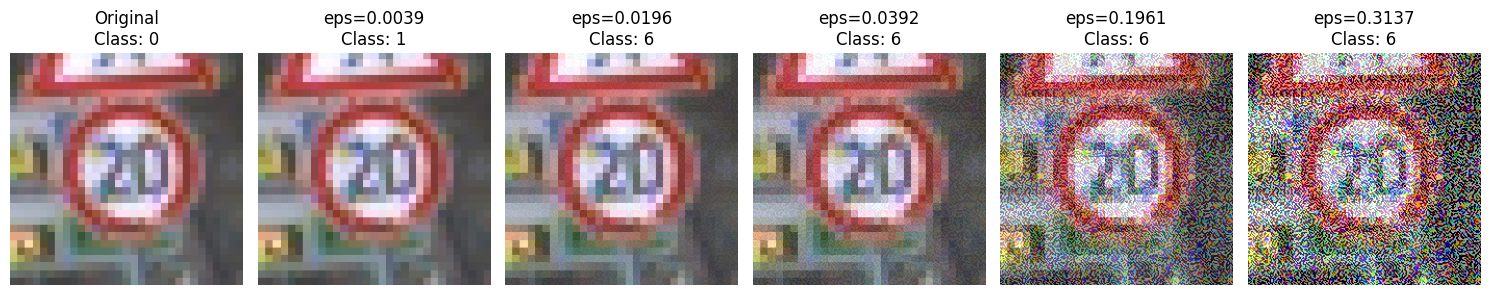

In [13]:
eps_values = [1/255, 5/255, 10/255, 50/255, 80/255]
sample_index = 0  # –ò–Ω–¥–µ–∫—Å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –¥–ª—è –¥–µ–º–æ–Ω—Å—Ç—Ä–∞—Ü–∏–∏
original_image = x_test[sample_index]
original_label = np.argmax(y_test[sample_index])
# 3. –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
attacked_images = []
predicted_classes = []

for eps in eps_values:
    # –°–æ–∑–¥–∞–Ω–∏–µ FGSM –∞—Ç–∞–∫–∏
    attack = FastGradientMethod(estimator=classifier, eps=eps)

    # –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
    attacked_image = attack.generate(x=original_image.reshape(1, *original_image.shape))[0]
    attacked_images.append(attacked_image)

    # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –∫–ª–∞—Å—Å–∞
    prediction = classifier.predict(attacked_image.reshape(1, *attacked_image.shape))
    predicted_class = np.argmax(prediction)
    predicted_classes.append(predicted_class)

# 4. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(15, 10))

# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
plt.subplot(1, len(eps_values) + 1, 1)
plt.imshow(original_image)
plt.title(f"Original\nClass: {original_label}")
plt.axis("off")

# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
for i, eps in enumerate(eps_values):
    plt.subplot(1, len(eps_values) + 1, i + 2)
    plt.imshow(attacked_images[i])
    plt.title(f"eps={eps:.4f}\nClass: {predicted_classes[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

12. ## –í—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∞—Ç–∞–∫ PGD —Å —Ä–∞–∑–ª–∏—á–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ eps


1. **–ü–∞—Ä–∞–º–µ—Ç—Ä—ã PGD –∞—Ç–∞–∫–∏**:
   - –í –¥–∞–Ω–Ω–æ–º —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–µ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –Ω–µ—Å–∫–æ–ª—å–∫–æ –∑–Ω–∞—á–µ–Ω–∏–π `eps = [1/255, 2/255, 3/255, 4/255, 5/255, 8/255, 10/255, 20/255, 50/255, 80/255]` –¥–ª—è –∞—Ç–∞–∫–∏ PGD.
   - –ö–∞–∂–¥–∞—è –∞—Ç–∞–∫–∞ –≤—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è —Å —à–∞–≥–æ–º –∏–∑–º–µ–Ω–µ–Ω–∏—è –∑–∞ –∏—Ç–µ—Ä–∞—Ü–∏—é `eps_step = 2 / 255` –∏ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –∏—Ç–µ—Ä–∞—Ü–∏–π `max_iter = 40`.

2. **–ê—Ç–∞–∫–∞ PGD –¥–ª—è —Ä–∞–∑–ª–∏—á–Ω—ã—Ö eps**:
   - –î–ª—è –∫–∞–∂–¥–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è `eps` –≤ `eps_values` —Å–æ–∑–¥–∞–µ—Ç—Å—è –∞—Ç–∞–∫–∞ PGD —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏, –∫–æ—Ç–æ—Ä—ã–µ –≤–∫–ª—é—á–∞—é—Ç –Ω–æ—Ä–º—É, —à–∞–≥ –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π.
   - –ù–∞ –∫–∞–∂–¥–æ–º —à–∞–≥–µ –≥–µ–Ω–µ—Ä–∏—Ä—É—é—Ç—Å—è –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –∏ –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç—Å—è —Ç–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –Ω–∞ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö.
   - –¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –ø—É—Ç–µ–º –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –¥–æ–ª–∏ –ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –Ω–∞ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.
   
3. **–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∞—Ç–∞–∫–∏**:
   - –†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–æ—á–Ω–æ—Å—Ç–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è `eps` —Å–æ–±–∏—Ä–∞—é—Ç—Å—è –∏ –≤—ã–≤–æ–¥—è—Ç—Å—è –Ω–∞ —ç–∫—Ä–∞–Ω.
   - –ß–µ–º –≤—ã—à–µ –∑–Ω–∞—á–µ–Ω–∏–µ `eps`, —Ç–µ–º —Å–∏–ª—å–Ω–µ–µ –∞—Ç–∞–∫–∞, —á—Ç–æ –º–æ–∂–µ—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –ø–æ–≤–ª–∏—è—Ç—å –Ω–∞ —Ç–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏.

4. **–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∞—Ç–∞–∫**:
   - –î–ª—è –≤—ã–±—Ä–∞–Ω–Ω–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è (–≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –∏–Ω–¥–µ–∫—Å `sample_index = 0`) –æ—Ç–æ–±—Ä–∞–∂–∞—é—Ç—Å—è –∫–∞–∫ –∏—Å—Ö–æ–¥–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ, —Ç–∞–∫ –∏ –Ω–µ—Å–∫–æ–ª—å–∫–æ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –≤–µ—Ä—Å–∏–π —Å —Ä–∞–∑–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ `eps`.
   - –î–ª—è –∫–∞–∂–¥–æ–≥–æ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç—Å—è —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∞—è –º–µ—Ç–∫–∞ –∫–ª–∞—Å—Å–∞, –∫–æ—Ç–æ—Ä—É—é –ø—Ä–µ–¥—Å–∫–∞–∑–∞–ª–∞ –º–æ–¥–µ–ª—å –Ω–∞ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω–æ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–∏.

–í—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è PGD –∞—Ç–∞–∫–∞ —Å eps=0.003922...


PGD - Batches: 0it [00:00, ?it/s]

–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (eps=0.003922): 2.00%
–í—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è PGD –∞—Ç–∞–∫–∞ —Å eps=0.007843...


PGD - Batches: 0it [00:00, ?it/s]

–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (eps=0.007843): 0.00%
–í—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è PGD –∞—Ç–∞–∫–∞ —Å eps=0.011765...


PGD - Batches: 0it [00:00, ?it/s]

–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (eps=0.011765): 0.00%
–í—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è PGD –∞—Ç–∞–∫–∞ —Å eps=0.015686...


PGD - Batches: 0it [00:00, ?it/s]

–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (eps=0.015686): 0.00%
–í—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è PGD –∞—Ç–∞–∫–∞ —Å eps=0.019608...


PGD - Batches: 0it [00:00, ?it/s]

–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (eps=0.019608): 0.00%
–í—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è PGD –∞—Ç–∞–∫–∞ —Å eps=0.031373...


PGD - Batches: 0it [00:00, ?it/s]

–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (eps=0.031373): 0.00%
–í—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è PGD –∞—Ç–∞–∫–∞ —Å eps=0.039216...


PGD - Batches: 0it [00:00, ?it/s]

–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (eps=0.039216): 0.00%
–í—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è PGD –∞—Ç–∞–∫–∞ —Å eps=0.078431...


PGD - Batches: 0it [00:00, ?it/s]

–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (eps=0.078431): 0.00%
–í—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è PGD –∞—Ç–∞–∫–∞ —Å eps=0.196078...


PGD - Batches: 0it [00:00, ?it/s]

–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (eps=0.196078): 0.00%
–í—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è PGD –∞—Ç–∞–∫–∞ —Å eps=0.313725...


PGD - Batches: 0it [00:00, ?it/s]

–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (eps=0.313725): 0.00%


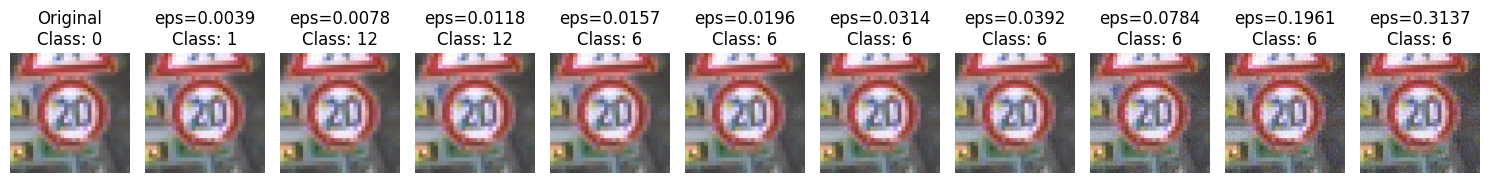


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∞—Ç–∞–∫:
eps=0.003922, accuracy=2.00%
eps=0.007843, accuracy=0.00%
eps=0.011765, accuracy=0.00%
eps=0.015686, accuracy=0.00%
eps=0.019608, accuracy=0.00%
eps=0.031373, accuracy=0.00%
eps=0.039216, accuracy=0.00%
eps=0.078431, accuracy=0.00%
eps=0.196078, accuracy=0.00%
eps=0.313725, accuracy=0.00%


In [14]:
eps_values = [1/255, 2/255, 3/255, 4/255, 5/255, 8/255, 10/255, 20/255, 50/255, 80/255]
eps_step = 2 / 255  # –®–∞–≥ –∏–∑–º–µ–Ω–µ–Ω–∏—è –∑–∞ –∏—Ç–µ—Ä–∞—Ü–∏—é
max_iter = 40  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π

# –í—ã–ø–æ–ª–Ω–µ–Ω–∏–µ PGD –∞—Ç–∞–∫ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ eps
results2 = []
attacked_images_per_eps2 = {}

for eps in eps_values:
    print(f"–í—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è PGD –∞—Ç–∞–∫–∞ —Å eps={eps:.6f}...")

    # –°–æ–∑–¥–∞–Ω–∏–µ PGD –∞—Ç–∞–∫–∏
    attack = ProjectedGradientDescent(
        estimator=classifier,
        norm=np.inf,
        eps=eps,
        eps_step=eps_step,
        max_iter=max_iter,
        targeted=False
    )

    # –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
    x_test_adv = attack.generate(x=x_test)
    attacked_images_per_eps2[eps] = x_test_adv  # –°–æ—Ö—Ä–∞–Ω—è–µ–º –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è

    # –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏ –Ω–∞ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
    predictions = classifier.predict(x_test_adv, batch_size=50)
    accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
    print(f"–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (eps={eps:.6f}): {accuracy * 100:.2f}%")

    # –°–æ—Ö—Ä–∞–Ω—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
    results2.append({'eps': eps, 'accuracy': accuracy})

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–ª—è –æ—Ç–¥–µ–ª—å–Ω—ã—Ö eps
sample_index = 0  # –ò–Ω–¥–µ–∫—Å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –¥–ª—è –¥–µ–º–æ–Ω—Å—Ç—Ä–∞—Ü–∏–∏
original_image = x_test[sample_index]

plt.figure(figsize=(15, 10))

# –ò—Å—Ö–æ–¥–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
plt.subplot(1, len(eps_values) + 1, 1)
plt.imshow(original_image)
plt.title(f"Original\nClass: {np.argmax(y_test[sample_index])}")
plt.axis("off")

# –ê—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
for i, eps in enumerate(eps_values):
    attacked_image = attacked_images_per_eps2[eps][sample_index]
    attacked_prediction = np.argmax(classifier.predict(attacked_image.reshape(1, *attacked_image.shape)))

    plt.subplot(1, len(eps_values) + 1, i + 2)
    plt.imshow(attacked_image)
    plt.title(f"eps={eps:.4f}\nClass: {attacked_prediction}")
    plt.axis("off")

plt.tight_layout()
plt.show()

# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
print("\n–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∞—Ç–∞–∫:")
for result in results2:
    print(f"eps={result['eps']:.6f}, accuracy={result['accuracy'] * 100:.2f}%")

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è PGD-–∞—Ç–∞–∫–∏ –ø–æ–∫–∞–∑–∞–ª–∏, —á—Ç–æ —Ç–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —Å–Ω–∏–∂–∞–µ—Ç—Å—è –¥–∞–∂–µ –ø—Ä–∏ –º–∞–ª—ã—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ eps, –∫–æ—Ç–æ—Ä—ã–π —Ä–µ–≥—É–ª–∏—Ä—É–µ—Ç —Å—Ç–µ–ø–µ–Ω—å –∏–∑–º–µ–Ω–µ–Ω–∏—è –ø–∏–∫—Å–µ–ª–µ–π –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –∞—Ç–∞–∫–∏. –í–æ—Ç –±–æ–ª–µ–µ –¥–µ—Ç–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤:

–û—á–µ–Ω—å –≤—ã—Å–æ–∫–∞—è —É—è–∑–≤–∏–º–æ—Å—Ç—å –º–æ–¥–µ–ª–∏:

–î–∞–∂–µ –ø—Ä–∏ —Å–∞–º—ã—Ö –Ω–∏–∑–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö eps = 0.003922, –º–æ–¥–µ–ª—å –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Ç–æ—á–Ω–æ—Å—Ç—å 2%, —á—Ç–æ —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –æ –µ–µ —É—è–∑–≤–∏–º–æ—Å—Ç–∏ –∫ –∞—Ç–∞–∫–∞–º —Ç–∏–ø–∞ PGD. –≠—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –¥–∞–∂–µ –º–∞–ª—ã–µ –∏–∑–º–µ–Ω–µ–Ω–∏—è –≤ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–∏ –º–æ–≥—É—Ç —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –ø–æ–≤–ª–∏—è—Ç—å –Ω–∞ —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –ø—Ä–∞–≤–∏–ª—å–Ω–æ.
–†–µ–∑–∫–æ–µ —É—Ö—É–¥—à–µ–Ω–∏–µ —Ç–æ—á–Ω–æ—Å—Ç–∏ —Å —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º eps:

–ö–∞–∫ —Ç–æ–ª—å–∫–æ eps —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è –¥–æ –∑–Ω–∞—á–µ–Ω–∏–π –æ–∫–æ–ª–æ 0.007843, –º–æ–¥–µ–ª—å –Ω–∞—á–∏–Ω–∞–µ—Ç –æ—à–∏–±–∞—Ç—å—Å—è –Ω–∞ –≤—Å–µ—Ö –ø—Ä–∏–º–µ—Ä–∞—Ö, —Å —Ç–æ—á–Ω–æ—Å—Ç—å—é, —Å–Ω–∏–∂–∞—é—â–µ–π—Å—è –¥–æ 0%. –≠—Ç–æ –ø–æ–¥—á–µ—Ä–∫–∏–≤–∞–µ—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–µ —Å–Ω–∏–∂–µ–Ω–∏–µ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –Ω–∞ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.
–ú–µ—Ö–∞–Ω–∏–∑–º –∞—Ç–∞–∫–∏:

–ú–µ—Ç–æ–¥ Projected Gradient Descent (PGD) –ø—Ä–µ–¥–Ω–∞–∑–Ω–∞—á–µ–Ω –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –∞—Ç–∞–∫ —Å –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–º —É–≥—Ä–æ–∂–∞—é—â–∏–º –∏–∑–º–µ–Ω–µ–Ω–∏–µ–º (—Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ–º eps –Ω–∞ –∫–∞–∂–¥–æ–º —à–∞–≥–µ), —á—Ç–æ –æ–±—ä—è—Å–Ω—è–µ—Ç —Å—Ç–æ–ª—å —Å–µ—Ä—å–µ–∑–Ω—ã–µ –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è –¥–ª—è —Ä–∞–±–æ—Ç—ã –º–æ–¥–µ–ª–∏ –ø—Ä–∏ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –Ω–µ–±–æ–ª—å—à–∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö eps.

---

13. ## –í—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∞—Ç–∞–∫ FGSM –∏ PGD —Å —Ä–∞–∑–ª–∏—á–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ `eps`

## 1. –ó–∞–¥–∞–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π `eps`

–í –¥–∞–Ω–Ω–æ–º —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–µ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –Ω–µ—Å–∫–æ–ª—å–∫–æ –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ `eps`, –∫–æ—Ç–æ—Ä—ã–π –∫–æ–Ω—Ç—Ä–æ–ª–∏—Ä—É–µ—Ç —Å—Ç–µ–ø–µ–Ω—å –∏—Å–∫–∞–∂–µ–Ω–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –ø—Ä–∏ –∞—Ç–∞–∫–µ. –ü–µ—Ä–µ—á–µ–Ω—å –∑–Ω–∞—á–µ–Ω–∏–π:

- `eps = [1/255, 5/255, 10/255, 50/255, 80/255]`

## 2. –°–ª–æ–≤–∞—Ä—å –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤

–î–ª—è —É–ø—Ä–æ—â–µ–Ω–∏—è —Ä–∞–±–æ—Ç—ã, —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏ –¥–ª—è –∞—Ç–∞–∫ FGSM –∏ PGD –±—É–¥—É—Ç —Ö—Ä–∞–Ω–∏—Ç—å—Å—è –≤ —Å–ª–æ–≤–∞—Ä–µ:

- `accuracy_results = {"FGSM": [], "PGD": []}`

–≠—Ç–æ—Ç —Å–ª–æ–≤–∞—Ä—å –±—É–¥–µ—Ç —Å–æ–¥–µ—Ä–∂–∞—Ç—å —Å–ø–∏—Å–æ–∫ —Ç–æ—á–Ω–æ—Å—Ç–µ–π –¥–ª—è –∫–∞–∂–¥–æ–π –∏–∑ –∞—Ç–∞–∫ –ø—Ä–∏ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö `eps`.

## 3. –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∞—Ç–∞–∫–∏ –∏ –æ—Ü–µ–Ω–∫–∏ —Ç–æ—á–Ω–æ—Å—Ç–∏

–î–ª—è –∫–∞–∂–¥–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è `eps` –±—É–¥—É—Ç –≤—ã–ø–æ–ª–Ω—è—Ç—å—Å—è —Å–ª–µ–¥—É—é—â–∏–µ —à–∞–≥–∏:

1. –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ `eps` –¥–ª—è –∞—Ç–∞–∫–∏.
2. –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π.
3. –û—Ü–µ–Ω–∫–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏ –Ω–∞ —ç—Ç–∏—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è—Ö.

–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç—Å—è –∫–∞–∫ –¥–æ–ª—è –ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –Ω–∞ –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è—Ö.

## 4. –û—Ü–µ–Ω–∫–∞ –¥–ª—è –∞—Ç–∞–∫ FGSM –∏ PGD

–í —ç—Ç–æ–º —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–µ –±—É–¥–µ—Ç —Å–æ–∑–¥–∞–Ω–æ –¥–≤–∞ –æ–±—ä–µ–∫—Ç–∞ –∞—Ç–∞–∫–∏: –æ–¥–∏–Ω –¥–ª—è **Fast Gradient Sign Method (FGSM)** –∏ –¥—Ä—É–≥–æ–π –¥–ª—è **Projected Gradient Descent (PGD)**. –ü–∞—Ä–∞–º–µ—Ç—Ä `eps` –±—É–¥–µ—Ç –∏–∑–º–µ–Ω—è—Ç—å—Å—è –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –∏–∑ —Å–ø–∏—Å–∫–∞ `eps_values`.

1. –î–ª—è FGSM —Å–æ–∑–¥–∞–µ—Ç—Å—è –∞—Ç–∞–∫–∞, –≥–¥–µ `eps` –æ–±–Ω–æ–≤–ª—è–µ—Ç—Å—è –Ω–∞ –∫–∞–∂–¥–æ–º —à–∞–≥–µ –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.
2. –î–ª—è PGD —Ç–∞–∫–∂–µ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è `eps`, —Å —à–∞–≥–æ–º –∏–∑–º–µ–Ω–µ–Ω–∏—è –∏ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –∏—Ç–µ—Ä–∞—Ü–∏–π, –∫–æ—Ç–æ—Ä—ã–µ —Ç–∞–∫–∂–µ –±—É–¥—É—Ç –æ–±–Ω–æ–≤–ª—è—Ç—å—Å—è.

## 5. –û—Ü–µ–Ω–∫–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏ –¥–ª—è FGSM

–ú–æ–¥–µ–ª—å –±—É–¥–µ—Ç –æ—Ü–µ–Ω–∏–≤–∞—Ç—å—Å—è –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è `eps` —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º FGSM –∞—Ç–∞–∫–∏, –∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –±—É–¥–µ—Ç —Ö—Ä–∞–Ω–∏—Ç—å—Å—è –≤ —Å–ª–æ–≤–∞—Ä–µ `accuracy_results`.

## 6. –û—Ü–µ–Ω–∫–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏ –¥–ª—è PGD

–¢–∞–∫ –∂–µ –∫–∞–∫ –∏ –¥–ª—è FGSM, –±—É–¥–µ—Ç –ø—Ä–æ–≤–µ–¥–µ–Ω–∞ –æ—Ü–µ–Ω–∫–∞ –¥–ª—è –∞—Ç–∞–∫–∏ PGD, –∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –±—É–¥—É—Ç —Å–æ—Ö—Ä–∞–Ω—è—Ç—å—Å—è –≤ —Ç–æ–º –∂–µ —Å–ª–æ–≤–∞—Ä–µ –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ –∞–Ω–∞–ª–∏–∑–∞.

## 7. –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç `eps`


Evaluating FGSM with eps=0.003922...
FGSM Accuracy at eps=0.003922: 16.00%
Evaluating FGSM with eps=0.019608...
FGSM Accuracy at eps=0.019608: 14.00%
Evaluating FGSM with eps=0.039216...
FGSM Accuracy at eps=0.039216: 2.00%
Evaluating FGSM with eps=0.196078...
FGSM Accuracy at eps=0.196078: 0.00%
Evaluating FGSM with eps=0.313725...
FGSM Accuracy at eps=0.313725: 0.00%
Evaluating PGD with eps=0.003922...


PGD - Batches: 0it [00:00, ?it/s]

PGD Accuracy at eps=0.003922: 2.00%
Evaluating PGD with eps=0.019608...


PGD - Batches: 0it [00:00, ?it/s]

PGD Accuracy at eps=0.019608: 0.00%
Evaluating PGD with eps=0.039216...


PGD - Batches: 0it [00:00, ?it/s]

PGD Accuracy at eps=0.039216: 0.00%
Evaluating PGD with eps=0.196078...


PGD - Batches: 0it [00:00, ?it/s]

PGD Accuracy at eps=0.196078: 0.00%
Evaluating PGD with eps=0.313725...


PGD - Batches: 0it [00:00, ?it/s]

PGD Accuracy at eps=0.313725: 0.00%


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 120598 (\N{MATHEMATICAL ITALIC EPSILON SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


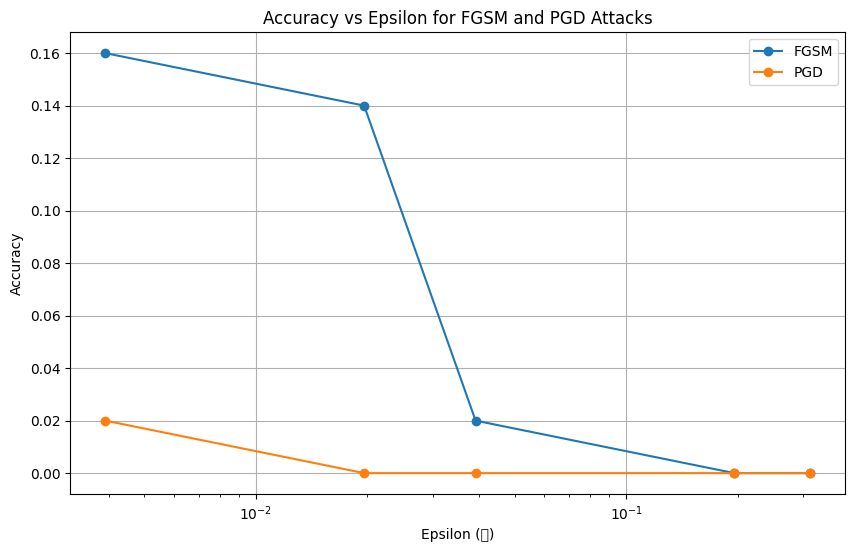

In [15]:
eps_values = [1/255, 5/255, 10/255, 50/255, 80/255]
accuracy_results = {"FGSM": [], "PGD": []}

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∞—Ç–∞–∫–∏ –∏ –æ—Ü–µ–Ω–∫–∏ —Ç–æ—á–Ω–æ—Å—Ç–∏
def evaluate_attack(attack_name, attack_object, x_test, y_test):
    accuracies = []
    for eps in eps_values:
        print(f"Evaluating {attack_name} with eps={eps:.6f}...")

        # –û–±–Ω–æ–≤–ª—è–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä eps –¥–ª—è –∞—Ç–∞–∫–∏
        attack_object.set_params(eps=eps)

        # –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
        x_test_adv = attack_object.generate(x=x_test)

        # –û—Ü–µ–Ω–∫–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏
        predictions = classifier.predict(x_test_adv, batch_size=16)
        accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
        print(f"{attack_name} Accuracy at eps={eps:.6f}: {accuracy * 100:.2f}%")
        accuracies.append(accuracy)
    return accuracies
fgsm_attack = FastGradientMethod(estimator=classifier, eps=0.0)  # eps –±—É–¥–µ—Ç –∏–∑–º–µ–Ω—è—Ç—å—Å—è –≤ —Ü–∏–∫–ª–µ
pgd_attack = ProjectedGradientDescent(
    estimator=classifier,
    norm=np.inf,
    eps=0.0,  # eps –±—É–¥–µ—Ç –∏–∑–º–µ–Ω—è—Ç—å—Å—è –≤ —Ü–∏–∫–ª–µ
    eps_step=2/255,
    max_iter=40,
    targeted=False
)
# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏ –¥–ª—è FGSM
accuracy_results["FGSM"] = evaluate_attack("FGSM", fgsm_attack, x_test, y_test)

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏ –¥–ª—è PGD
accuracy_results["PGD"] = evaluate_attack("PGD", pgd_attack, x_test, y_test)

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.figure(figsize=(10, 6))

plt.plot(eps_values, accuracy_results["FGSM"], marker='o', label='FGSM')
plt.plot(eps_values, accuracy_results["PGD"], marker='o', label='PGD')

# –ù–∞—Å—Ç—Ä–æ–π–∫–∏ –≥—Ä–∞—Ñ–∏–∫–∞
plt.title('Accuracy vs Epsilon for FGSM and PGD Attacks')
plt.xlabel('Epsilon (ùúñ)')
plt.ylabel('Accuracy')
plt.xscale('log')  # –õ–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–∞—è —à–∫–∞–ª–∞ –¥–ª—è eps
plt.grid(True)
plt.legend()

# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.show()

14. ## –û—Ü–µ–Ω–∫–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏ VGG16 –Ω–∞ –∞—Ç–∞–∫–∞—Ö FGSM –∏ PGD

### 1. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö:
- –ó–∞–≥—Ä—É–∂–∞—é—Ç—Å—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –¥–ª—è —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –º–æ–¥–µ–ª–∏ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º `ImageDataGenerator` –¥–ª—è –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π.
- –ò–∑ –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏–∏ `test` (–ø–∞–ø–∫–∞ –¥–ª—è —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö) —Ñ–æ—Ä–º–∏—Ä—É–µ—Ç—Å—è –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä –¥–ª—è –ø–æ–¥–∞—á–∏ –±–∞—Ç—á–µ–π –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ –º–æ–¥–µ–ª—å.
- –†–∞–∑–º–µ—Ä –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∏–∑–º–µ–Ω—è–µ—Ç—Å—è –Ω–∞ `(224, 224)` ‚Äî —ç—Ç–æ –ø–æ–¥—Ö–æ–¥—è—â–∏–π —Ä–∞–∑–º–µ—Ä –¥–ª—è —Å–µ—Ç–∏ VGG16.

### 2. –ó–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥–µ–ª–∏ VGG16:
- –ú–æ–¥–µ–ª—å VGG16 –∑–∞–≥—Ä—É–∂–∞–µ—Ç—Å—è –∏–∑ —Ñ–∞–π–ª–∞ `vgg16.h5`, –∫–æ—Ç–æ—Ä—ã–π –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ –æ–±—É—á–µ–Ω.
- –° –ø–æ–º–æ—â—å—é —Ñ—É–Ω–∫—Ü–∏–∏ `predict_fn_vgg16` —Ä–µ–∞–ª–∏–∑—É–µ—Ç—Å—è –ø—Ä–æ–≥–Ω–æ–∑ –Ω–∞ –æ—Å–Ω–æ–≤–µ –∑–∞–≥—Ä—É–∂–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏.

### 3. –°–æ–∑–¥–∞–Ω–∏–µ –∞—Ç–∞–∫:
- –í –∫–æ–¥–µ —Å–æ–∑–¥–∞–Ω—ã –¥–≤–µ –∞—Ç–∞–∫–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ –∫–ª–∞—Å—Å–æ–≤ `FastGradientMethod` (FGSM) –∏ `ProjectedGradientDescent` (PGD):
    - –î–ª—è FGSM –∏ PGD –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –ø–∞—Ä–∞–º–µ—Ç—Ä `eps`, –∫–æ—Ç–æ—Ä—ã–π –∏–∑–º–µ–Ω—è–µ—Ç—Å—è –≤ –∑–∞–¥–∞–Ω–Ω—ã—Ö –ø—Ä–µ–¥–µ–ª–∞—Ö, —á—Ç–æ–±—ã –ø—Ä–æ—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞—Ç—å –≤–ª–∏—è–Ω–∏–µ —Ä–∞–∑–Ω—ã—Ö —É—Ä–æ–≤–Ω–µ–π –∞—Ç–∞–∫.
    - –î–ª—è –∞—Ç–∞–∫ PGD –∑–∞–¥–∞–µ—Ç—Å—è —à–∞–≥ –∞—Ç–∞–∫–∏ (`eps_step=2/255`), –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π (40), –∞ —Ç–∞–∫–∂–µ –Ω–æ—Ä–º–∏—Ä–æ–≤–∫–∞ –ø–æ –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ–π –Ω–æ—Ä–º–µ (`np.inf`).

### 4. –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∞—Ç–∞–∫:
- –§—É–Ω–∫—Ü–∏—è `evaluate_attack`:
    - –î–ª—è –∫–∞–∂–¥–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è `eps` –∏–∑ –∑–∞—Ä–∞–Ω–µ–µ –∑–∞–¥–∞–Ω–Ω—ã—Ö (1/255, 5/255, 10/255, 50/255, 80/255) –ø—Ä–æ–≤–æ–¥–∏—Ç—Å—è –∞—Ç–∞–∫–∞.
    - –î–ª—è –∫–∞–∂–¥–æ–π –∞—Ç–∞–∫–∏ –≥–µ–Ω–µ—Ä–∏—Ä—É—é—Ç—Å—è –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è (`x_test_adv`).
    - –¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –≤—ã—á–∏—Å–ª—è–µ—Ç—Å—è –∫–∞–∫ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –ø—Ä–∞–≤–∏–ª—å–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –º–µ—Ç–æ–∫ –∫ –æ–±—â–µ–º—É —á–∏—Å–ª—É –ø—Ä–∏–º–µ—Ä–æ–≤.

### 5. –û—Ü–µ–Ω–∫–∞ –¥–ª—è FGSM –∏ PGD:
- –î–ª—è –∫–∞–∂–¥–æ–π –∏–∑ –∞—Ç–∞–∫ (FGSM –∏ PGD) –º–æ–¥–µ–ª–∏—Ä—É–µ—Ç—Å—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ —Ç–æ—á–Ω–æ—Å—Ç–∏, –∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å–æ—Ö—Ä–∞–Ω—è—é—Ç—Å—è –≤ —Å–ª–æ–≤–∞—Ä—å `accuracy_results_vgg16` —Å –∫–ª—é—á–∞–º–∏ `"FGSM"` –∏ `"PGD"`.
   
### 6. –ì—Ä–∞—Ñ–∏–∫ —Ç–æ—á–Ω–æ—Å—Ç–∏:

Found 7842 images belonging to 43 classes.
Evaluating FGSM with eps=0.003922...
FGSM Accuracy at eps=0.003922: 45.00%
Evaluating FGSM with eps=0.019608...
FGSM Accuracy at eps=0.019608: 47.50%
Evaluating FGSM with eps=0.039216...
FGSM Accuracy at eps=0.039216: 32.50%
Evaluating FGSM with eps=0.196078...
FGSM Accuracy at eps=0.196078: 0.00%
Evaluating FGSM with eps=0.313725...
FGSM Accuracy at eps=0.313725: 0.00%
Evaluating PGD with eps=0.003922...


PGD - Batches: 0it [00:00, ?it/s]

PGD Accuracy at eps=0.003922: 27.50%
Evaluating PGD with eps=0.019608...


PGD - Batches: 0it [00:00, ?it/s]

PGD Accuracy at eps=0.019608: 0.00%
Evaluating PGD with eps=0.039216...


PGD - Batches: 0it [00:00, ?it/s]

PGD Accuracy at eps=0.039216: 0.00%
Evaluating PGD with eps=0.196078...


PGD - Batches: 0it [00:00, ?it/s]

PGD Accuracy at eps=0.196078: 0.00%
Evaluating PGD with eps=0.313725...


PGD - Batches: 0it [00:00, ?it/s]

PGD Accuracy at eps=0.313725: 0.00%


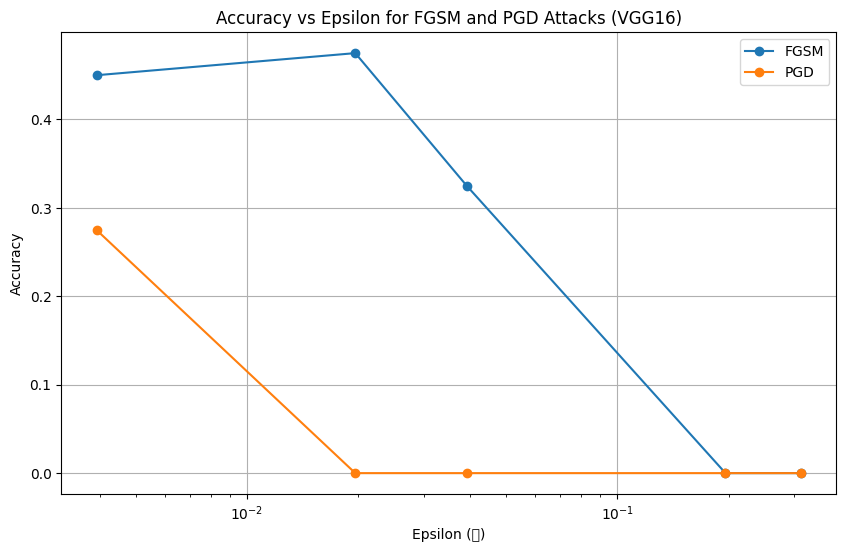

In [17]:
eps_values = [1/255, 5/255, 10/255, 50/255, 80/255]
accuracy_results_vgg16 = {"FGSM": [], "PGD": []}

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∞—Ç–∞–∫–∏ –∏ –æ—Ü–µ–Ω–∫–∏ —Ç–æ—á–Ω–æ—Å—Ç–∏
def evaluate_attack(attack_name, attack_object, x_test, y_test):
    accuracies = []
    for eps in eps_values:
        print(f"Evaluating {attack_name} with eps={eps:.6f}...")

        # –û–±–Ω–æ–≤–ª—è–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä eps –¥–ª—è –∞—Ç–∞–∫–∏
        attack_object.set_params(eps=eps)

        # –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –∞—Ç–∞–∫–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
        x_test_adv = attack_object.generate(x=x_test)

        # –û—Ü–µ–Ω–∫–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏
        predictions = classifier_vgg16.predict(x_test_adv, batch_size=16)
        accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
        print(f"{attack_name} Accuracy at eps={eps:.6f}: {accuracy * 100:.2f}%")
        accuracies.append(accuracy)
    return accuracies
model_vgg16 = tf.keras.models.load_model('/content/vgg16.h5')

def predict_fn_vgg16(x, training=False):
    return model_vgg16(x, training=training)

loss_object_vgg16 = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
classifier_vgg16 = TensorFlowV2Classifier(
    model=predict_fn_vgg16,
    nb_classes=43,
    input_shape=(224, 224, 3),
    clip_values=(0, 1),
    loss_object=loss_object_vgg16
)

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
IMG_SIZE = (224, 224)
BATCH_SIZE = 16

test_dir = os.path.join(output_dir, 'test')
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=40,
    class_mode='categorical',
    shuffle=False
)

x_test, y_test = next(test_generator)

# –°–æ–∑–¥–∞–Ω–∏–µ –∞—Ç–∞–∫
fgsm_attack_vgg16 = FastGradientMethod(estimator=classifier_vgg16, eps=0.0)  # eps –±—É–¥–µ—Ç –∏–∑–º–µ–Ω—è—Ç—å—Å—è –≤ —Ü–∏–∫–ª–µ
pgd_attack_vgg16 = ProjectedGradientDescent(
    estimator=classifier_vgg16,
    norm=np.inf,
    eps=0.0,  # eps –±—É–¥–µ—Ç –∏–∑–º–µ–Ω—è—Ç—å—Å—è –≤ —Ü–∏–∫–ª–µ
    eps_step=2/255,
    max_iter=40,
    targeted=False
)

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏ VGG16 –¥–ª—è FGSM
accuracy_results_vgg16["FGSM"] = evaluate_attack("FGSM", fgsm_attack_vgg16, x_test, y_test)

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏ VGG16 –¥–ª—è PGD
accuracy_results_vgg16["PGD"] = evaluate_attack("PGD", pgd_attack_vgg16, x_test, y_test)

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.figure(figsize=(10, 6))

plt.plot(eps_values, accuracy_results_vgg16["FGSM"], marker='o', label='FGSM')
plt.plot(eps_values, accuracy_results_vgg16["PGD"], marker='o', label='PGD')

# –ù–∞—Å—Ç—Ä–æ–π–∫–∏ –≥—Ä–∞—Ñ–∏–∫–∞
plt.title('Accuracy vs Epsilon for FGSM and PGD Attacks (VGG16)')
plt.xlabel('Epsilon (ùúñ)')
plt.ylabel('Accuracy')
plt.xscale('log')  # –õ–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–∞—è —à–∫–∞–ª–∞ –¥–ª—è eps
plt.grid(True)
plt.legend()

# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.show()

15. ## –¢–∞–±–ª–∏—Ü–∞ —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ —Ç–æ—á–Ω–æ—Å—Ç–∏ –¥–ª—è –º–æ–¥–µ–ª–µ–π VGG16 –∏ ResNet50

In [18]:
import pandas as pd

# 1. –î–∞–Ω–Ω—ã–µ —Ç–æ—á–Ω–æ—Å—Ç–∏ (–ø—Ä–∏–º–µ—Ä–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∏–ª–∏ —Ä–µ–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è)
eps_values = [1/255, 5/255, 10/255, 50/255, 80/255]

# –†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–æ—á–Ω–æ—Å—Ç–∏ –¥–ª—è FGSM –∏ PGD –¥–ª—è –æ–±–µ–∏—Ö –º–æ–¥–µ–ª–µ–π
accuracy_vgg16_fgsm = accuracy_results_vgg16["FGSM"]
accuracy_vgg16_pgd = accuracy_results_vgg16["PGD"]

accuracy_resnet50_fgsm = accuracy_results["FGSM"]
accuracy_resnet50_pgd = accuracy_results["PGD"]

# 2. –°–æ–∑–¥–∞–Ω–∏–µ DataFrame
data = {
    "Epsilon (ùúñ)": eps_values,
    "VGG16 FGSM": accuracy_vgg16_fgsm,
    "VGG16 PGD": accuracy_vgg16_pgd,
    "ResNet50 FGSM": accuracy_resnet50_fgsm,
    "ResNet50 PGD": accuracy_resnet50_pgd
}

df = pd.DataFrame(data)

# 3. –í—ã–≤–æ–¥ —Ç–∞–±–ª–∏—Ü—ã
print("–¢–∞–±–ª–∏—Ü–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏:")
print(df)


–¢–∞–±–ª–∏—Ü–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏:
   Epsilon (ùúñ)  VGG16 FGSM  VGG16 PGD  ResNet50 FGSM  ResNet50 PGD
0     0.003922       0.450      0.275           0.16          0.02
1     0.019608       0.475      0.000           0.14          0.00
2     0.039216       0.325      0.000           0.02          0.00
3     0.196078       0.000      0.000           0.00          0.00
4     0.313725       0.000      0.000           0.00          0.00
